# **23차시: 모델 저장과 활용**
## 🔍 **학습목표**
- 학습된 모델을 저장하고 불러오는 이유를 이해한다.
- **`load_model`** 함수로 저장된 Keras 모델을 불러올 수 있다.
- 불러온 모델을 사용하여 새로운 데이터의 예측값을 출력할 수 있다.

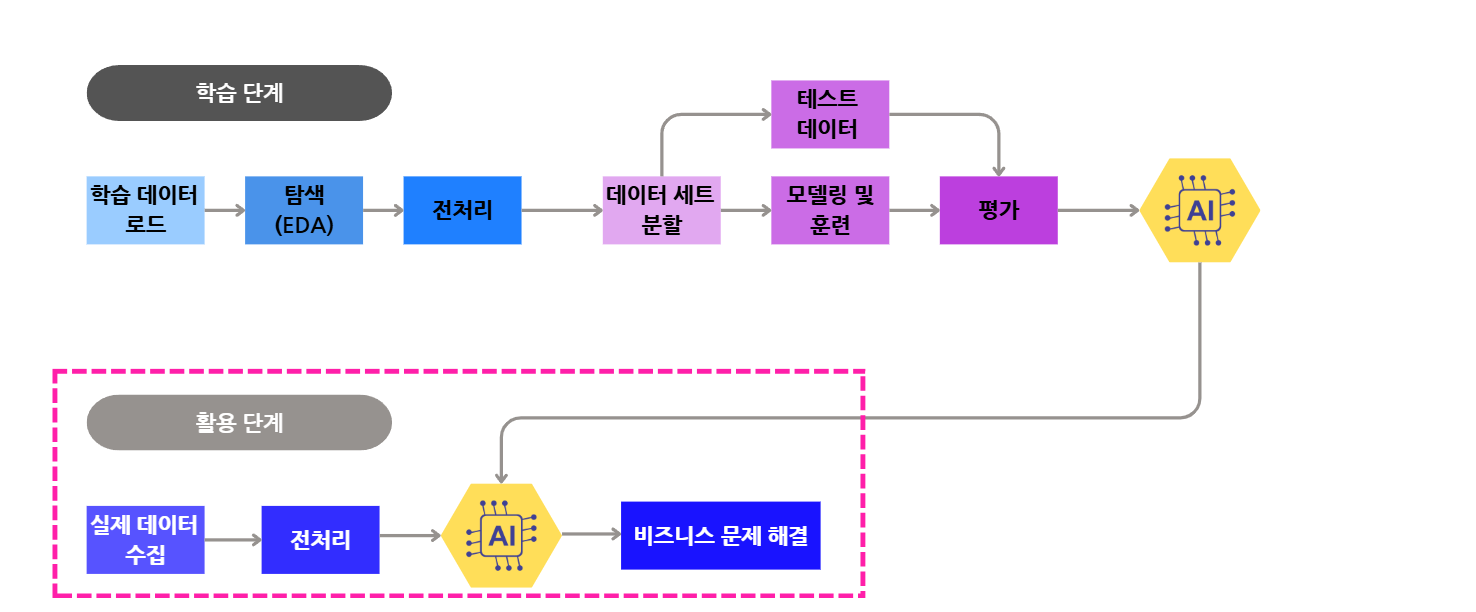

## **✅최고의 모델 불러오기:`load_model`**
- **모델을 저장하고 불러오는 이유**: 모델 학습은 많은 시간과 자원이 드는 과정이므로, 한 번 잘 만들어진 모델은 파일로 저장해두고 필요할 때마다 재사용하는 것이 효율적입니다.
    - 시간 절약: 재학습 과정 생략
    - 일관성: 언제 누가 사용해도 동일한 예측 결과 보장
    - 활용성: 저장된 모델 파일(.keras, .h5)을 다른 시스템이나 서비스(앱, 웹)에 탑재 가능

    ```python
        from tensorflow.keras.models import load_model

        best_model = load_model('best_model.keras')
        #best_model = load_model('best_model.h5')

        # 모델 구조를 확인하여 잘 불러와졌는지 살펴봅니다.
        best_model.summary()
    ```

## **✅새로운 데이터로 예측하기:`model.predict`**
- **시뮬레이션 데이터 준비**:
    - **데이터 조건**: 학습할 때 사용했던 데이터와 똑같은 형태(순서와 개수)의 피처가 들어와야만 합니다.
    - (시험에서는 데이터 주어짐.)

- **예측하기**:
    - 모델의 .predict() 메소드를 사용합니다.
    
    ```python

        # 시뮬레이션 데이터는 시험에서 주어짐.
        real_input = [학습할 때 사용했던 데이터와 동일한 구조]
        predicted_value = best_model.predict(real_input)

    ```

## **🎬 회귀(Regression) 모델 활용**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 가상 데이터 생성
X_reg = np.array([1, 2, 3, 4, 5]) # 공부 시간
y_reg = np.array([10, 20, 30, 40, 50]) # 시험 점수

# 모델 생성 및 학습
model_reg = Sequential()
model_reg.add(Dense(1, input_shape=[1]))
model_reg.compile(optimizer='sgd', loss='mse')
model_reg.fit(X_reg, y_reg, epochs=10, verbose=0)
model_reg.save('regression_model.keras') # 모델 저장


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 저장된 회귀 모델 불러오기 및 활용
from tensorflow.keras.models import load_model

# 모델 로드
loaded_reg_model = load_model('regression_model.keras')

# 새로운 데이터 예측 (6시간 공부하면 몇 점?)
new_data = np.array([[6]])
prediction = loaded_reg_model.predict(new_data)

print("--- 회귀 모델 예측 ---")
print(f"6시간 공부했을 때 예상 점수: {prediction[0][0]:.2f}점")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
--- 회귀 모델 예측 ---
6시간 공부했을 때 예상 점수: 53.54점


> **⭐ 족집게 팁**
> -  대괄호를 두 번 쓰는 이유: [[ ... ]]
    - 2차원 형태의 데이터, 즉 (데이터 개수, 특성 개수) 형태로 학습됨.
    - 한 개의 행을 가진 데이터의 의미
> - np.array()로 변환하는 이유:
    - TensorFlow와 Keras는 NumPy 배열이라는 특정 데이터 타입을 사용
> - predicted_value[0][0]:
    - 2차원으로 예측값을 반환하기때문
    - predicted_value[0] : 여러 개의 예측 결과 행 중에서 첫 번째 행을 선택
    - predicted_value[0][0] : 선택된 행 안에서 첫 번째 값을 선택

## **🎬 이진 분류(Binary Classification) 모델 활용**

In [ ]:
# 가상 데이터 생성
X_bin = np.array([1, 2, 3, 7, 8, 9]) # 공부 시간
y_bin = np.array([0, 0, 0, 1, 1, 1]) # 합격 여부

# 모델 생성 및 학습 (출력층이 다름)
model_bin = Sequential()
model_bin.add(Dense(1, activation='sigmoid', input_shape=[1]))  # activation='sigmoid'
model_bin.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_bin.fit(X_bin, y_bin, epochs=100, verbose=0)
model_bin.save('binary_model.keras')


In [ ]:
# 저장된 회귀 모델 불러오기 및 활용
# 모델 로드
loaded_bin_model = load_model('binary_model.keras')

# 새로운 데이터 예측 (5시간 공부하면 합격할까?)
new_data = np.array([[5]])
prediction = loaded_bin_model.predict(new_data)
result = "합격" if prediction[0][0] > 0.5 else "불합격"

print("\n--- 이진 분류 모델 예측 ---")
print(f"5시간 공부했을 때 예측 확률: {prediction[0][0]:.2f}")
print(f"최종 판정 (기준: 0.5): {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

--- 이진 분류 모델 예측 ---
5시간 공부했을 때 예측 확률: 0.73
최종 판정 (기준: 0.5): 합격


> **⭐ 족집게 팁**
> - 이진 분류 모델은 **합격할 확률(0~1 사이의 값)**을 반환합니다.
> - 이 확률 값을 보고, 보통 0.5를 기준으로 이보다 크면 '합격(1)', 작으면 '불합격(0)'이라고 최종 판정을 내립니다.

## **🎬  다중 분류(Multi-class Classification) 모델 활용**

In [ ]:
# 가상 데이터 생성
X_multi = np.array([[1, 8], [2, 7], [5, 9], [6, 8], [9, 10], [10, 9]]) # [공부, 수면]
y_multi = np.array([0, 0, 1, 1, 2, 2]) # 등급 (C, B, A)

# 모델 생성 및 학습 (출력층이 다름)
model_multi = Sequential()
model_multi.add(Dense(3, activation='softmax', input_shape=[2]))   # 클래스 개수=3, activation='softmax'
model_multi.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_multi.fit(X_multi, y_multi, epochs=100, verbose=0)
model_multi.save('multi_class_model.keras')


In [ ]:
# 저장된 회귀 모델 불러오기 및 활용
# 모델 로드
loaded_multi_model = load_model('multi_class_model.keras')

# 새로운 데이터 예측 ([8시간 공부, 9시간 수면]이라면 무슨 등급?)
new_data = np.array([[8, 9]])
prediction = loaded_multi_model.predict(new_data)
result_class = np.argmax(prediction) # 가장 높은 확률의 인덱스를 찾음
grades = ['C', 'B', 'A']

print("\n--- 다중 분류 모델 예측 ---")
print(f"[C, B, A] 등급일 각 확률: {np.round(prediction, 2)}")
print(f"가장 높은 확률의 인덱스: {result_class}")
print(f"최종 판정 등급: {grades[result_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

--- 다중 분류 모델 예측 ---
[C, B, A] 등급일 각 확률: [[0.03 0.34 0.63]]
가장 높은 확률의 인덱스: 2
최종 판정 등급: A


> **⭐ 족집게 팁**
> - 다중 분류 모델은 각 클래스(A, B, C)에 속할 확률을 모두 배열로 반환합니다.
> - 우리는 이 중에서 **가장 높은 확률 값을 가진 클래스의 인덱스(np.argmax)**를 찾아, "A등급"이라고 최종 판정을 내립니다.

---

## **📝연습 문제**

### **문제 1. 아래 코드를 실행하시오.**

1.  **데이터 로드**: `jajang_price.csv` 파일을 `df` 변수에 저장하세요.
2.  **결측치 처리**: 결측치가 있는 행은 모두 삭제하세요. (`dropna()`)
3.  **인코딩**: `object` 타입의 모든 컬럼을 원-핫 인코딩(`get_dummies`) 하세요.
4.  **데이터 분할**: `price`를 타겟 변수(y)로, 나머지를 설명 변수(X)로 설정하여 훈련 데이터와 검증 데이터를 7:3 비율로 분할하세요. (`random_state=42`)

In [ ]:
# 아래 코드를 실행하여 데이터를 준비하시오.
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('jajang_price.csv')

df.dropna(inplace=True)

df = pd.get_dummies(df, drop_first=True)

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- 데이터 준비 완료 ---")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

--- 데이터 준비 완료 ---
X_train shape: (4830, 17)
y_train shape: (4830,)


### **문제 2. 아래의 지시사항 대로 X와 y에 대해 데이터 스케일링을 진행하시오.**

- 딥러닝 모델의 안정적인 학습을 위해, 1단계에서 분할한 모든 데이터에 **`StandardScaler`**를 적용하여 단위를 표준화하세요.

-   **X 데이터**: `x_scaler`를 사용하여 스케일링하고, `X_train_scaled`, `X_test_scaled`에 저장하세요.
-   **y 데이터**: `y_scaler`를 사용하여 스케일링하고, `y_train_scaled`, `y_test_scaled`에 저장하세요.
    -   **Tip!** `y` 데이터는 1차원 배열이므로, `.values.reshape(-1, 1)`을 사용하여 2차원 배열로 변경해야 합니다.

In [ ]:
# 아래의 코드를 실행시키시오.
from sklearn.preprocessing import StandardScaler

# X와 y를 위한 별도의 스케일러 2개 생성
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# X 데이터 스케일링
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# y 데이터 스케일링
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


### **문제 3. 아래의 코드를 실행시켜 모델을 만드시오.**


In [ ]:
# 정답 코드
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 모델 구성 및 컴파일
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

# 콜백 설정
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model_ckp = ModelCheckpoint(filepath='best_jajang_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200, batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[early_stop, model_ckp]
)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8960 - val_loss: 0.6069
Epoch 2/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4257 - val_loss: 0.6078
Epoch 3/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4883 - val_loss: 0.5996
Epoch 4/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4631 - val_loss: 0.5917
Epoch 5/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6807 - val_loss: 0.5968
Epoch 6/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4044 - val_loss: 0.6029
Epoch 7/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4784 - val_loss: 0.5970
Epoch 8/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4435 - val_loss: 0.5863
Epoch 9/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6451 - val_loss: 0.5982
Epoch 10/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4635 - val_loss: 0.5833
Epoch 11/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5151 - val_loss: 0.5868
Epoch 12/200
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

### **문제 4. 저장된 최고 성능 모델로 배포하기 전 최종 평가를 진행하시오.**

베스트 모델을 다시 불러와, 우리가 따로 빼두었던 최종 시험지인 **테스트 데이터(`X_test_scaled`, `y_test_scaled`)**에 대한 성능을 평가하여 최종 MSE(평균 제곱 오차)를 확인하세요.

1.  `load_model()` 함수를 사용하여 `best_jajang_model.keras` 파일을 `best_model` 변수에 불러오세요.
2.  불러온 `best_model`에 대해 `.evaluate()` 메서드를 사용하여 `X_test_scaled`와 `y_test_scaled`에 대한 성능을 측정하세요.
3.  평가 결과로 나온 MSE(Mean Squared Error) 값을 소수점 넷째 자리까지 출력하세요.

In [ ]:
# 여기에 코드를 작성하세요.
from tensorflow.keras.models import load_model
# 최고 성능 모델 로드
best_model = load_model('')

### **문제 5. 2025년 서울의 한 고급중식당에서 판매될 삼선짜장의 가격을 예측하시오.**

**[수행 절차]**
1.  새로운 데이터를 생성하고, 학습시 진행된 전처리를 적용하는 코드를 실행하시오.
2.  `best_model.predict()`로 예측하고 결과를 변수`pred_scaled`에 저장하시오..
5.  pred_scaled에 저장된 값은 스케일 된 자장면 가격이다. 따라서 학습 때 사용했던 **`y_scaler`**로 역변환 (`inverse_transform`)하여 '원'단위의 가격으로 변환하여 정수로 출력하시오.

In [ ]:
# 1. 새로운 데이터 생성
new_data_dict = {
    'year': [2025], 'cpi': [120], 'flour_index': [130], 'pork_index': [140],
    'onion_index': [150], 'minimum_wage': [10000], 'location': ['Seoul'],
    'restaurant_type': ['Premium'], 'delivery_only': [1],
    'coupon_discount': [5.0], 'special_menu': ['Samseon']
}
new_df = pd.DataFrame(new_data_dict)

# 2. 전처리 (학습 데이터 기준에 맞춤)
new_df_encoded = pd.get_dummies(new_df)

 #"기준이 되는 데이터프레임(X_train)을 보고, 내(new_df_encoded) 컬럼을 똑같이 다시
final_new_data = new_df_encoded.reindex(columns=X_train.columns, fill_value=0)
new_data_scaled = x_scaler.transform(final_new_data)

In [ ]:
# 여기에 코드를 작성하세요.
pred_scaled = best_model.predict()
pred_price = y_scaler.inverse_transform()

print(f"2025년 서울의 한 고급중식당에서 판매될 삼선짜장의 가격은:{}원")

---